In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
#Lấy dữ liệu từ file
import pandas as pd
jsonPath = 'rawData.json'
diamonds = pd.read_json(jsonPath)
print(diamonds)

            Cut Color Clarity   Symmetry  price  carat  lengthRatio  \
0     Excellent     K     VS2  Excellent   1920   0.85         1.01   
1     Excellent     E     VS2  Excellent    620   0.20         1.00   
2     Excellent     G    VVS2  Excellent    540   0.20         1.01   
3     Very Good     K     VS1  Very Good   9250   2.00         1.01   
4     Excellent     K     SI2  Excellent   7520   2.00         1.01   
...         ...   ...     ...        ...    ...    ...          ...   
3555  Excellent     J     SI2  Excellent    490   0.41         1.01   
3556  Excellent     J     SI1  Excellent   5780   1.54         1.01   
3557  Excellent     K     SI1  Excellent    490   0.41         1.00   
3558  Excellent     K     VS2  Excellent    370   0.33         1.01   
3559  Excellent     J     SI1  Excellent   5830   1.41         1.00   

      depthPercent  tablePercent  Width  Height  Length  
0             62.6            57   6.03    6.07    3.79  
1             60.1            6

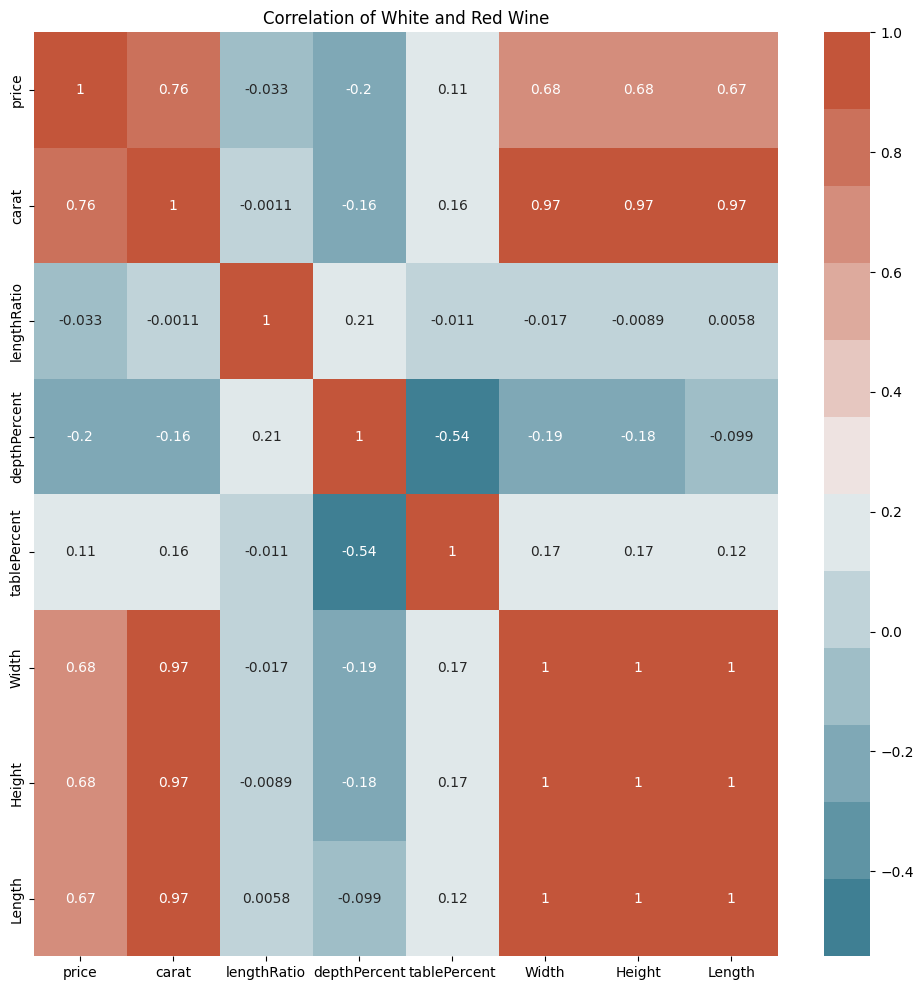

In [53]:
#Vẽ biểu đồ ảnh hưởng giữa các trường thông tin
plt.figure(figsize=(12, 12))
categorical_cols = diamonds.select_dtypes(include=['object']).columns
df_corr = diamonds.drop(categorical_cols, axis=1).corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Correlation of White and Red Wine")
plt.show()

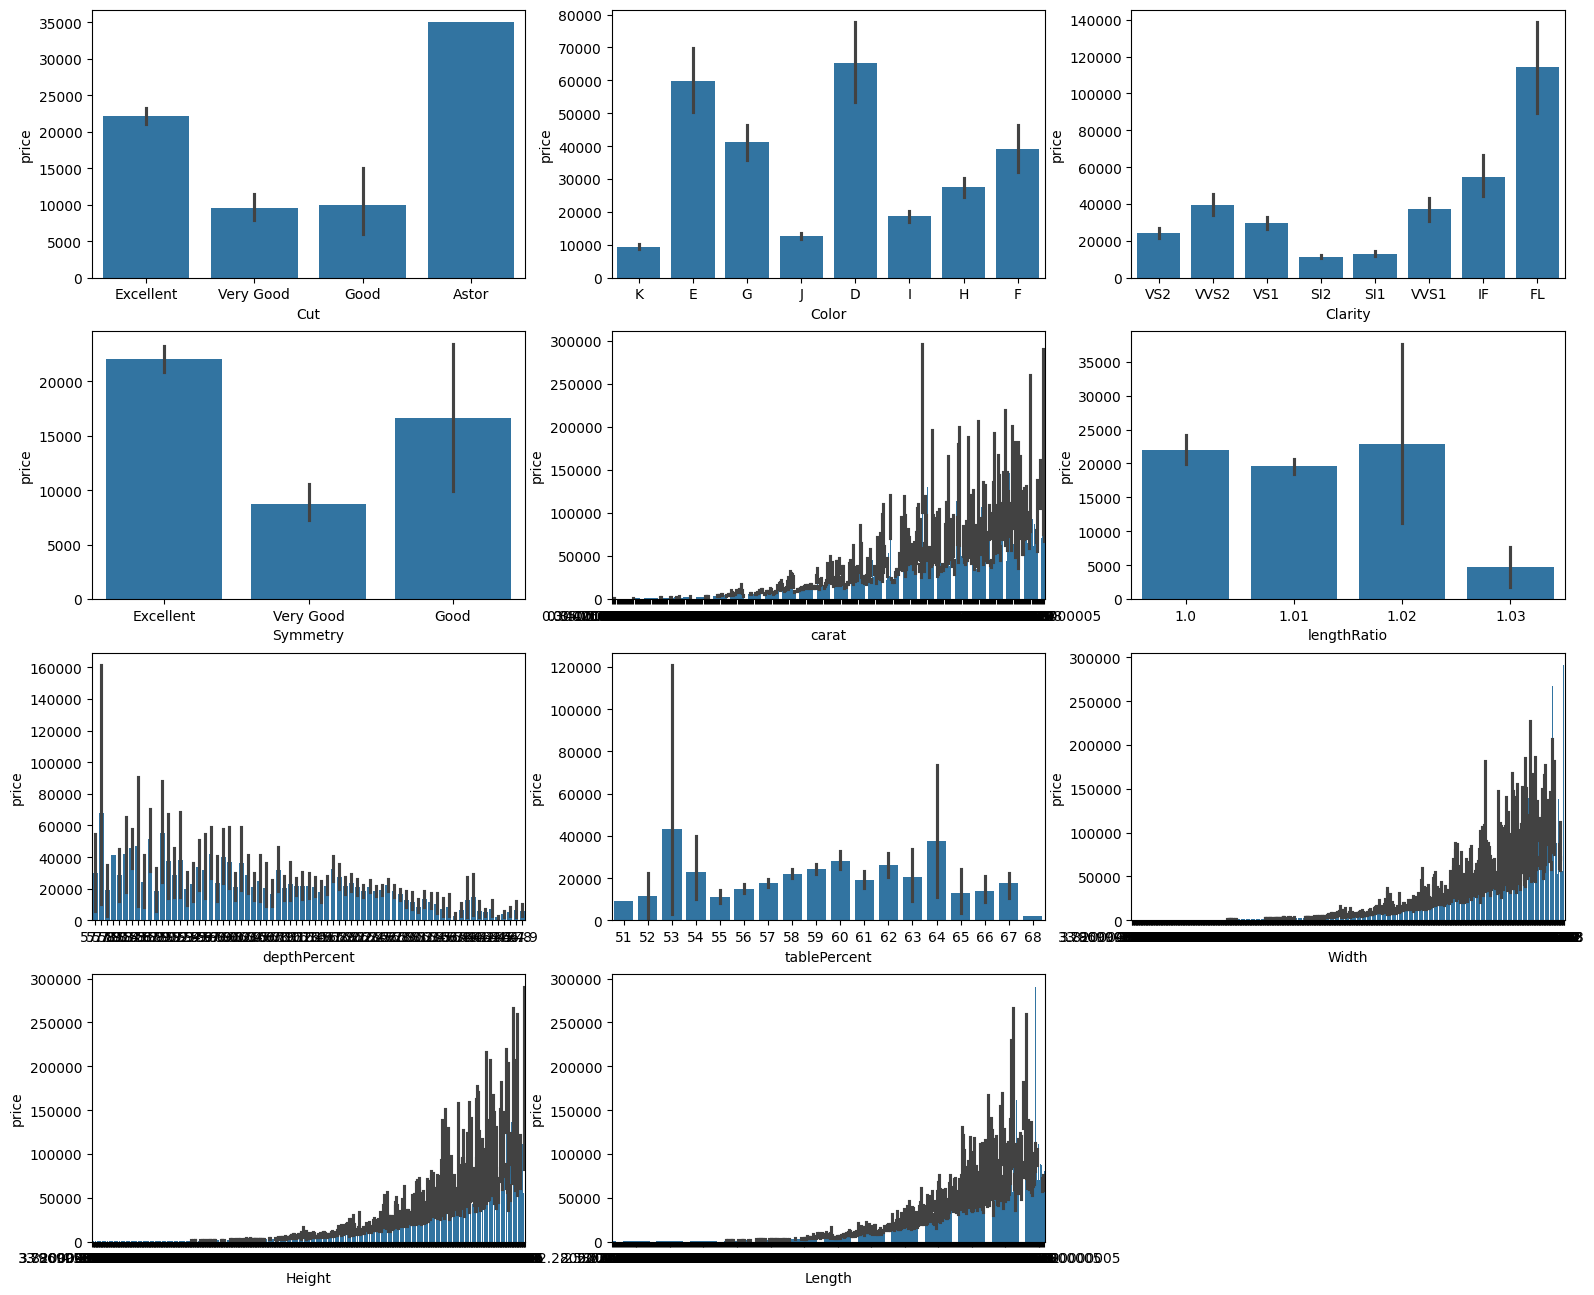

In [54]:
import matplotlib.pyplot as plt

i = 1
plt.figure(figsize=(19, 16))
for c in diamonds.columns:
    if c != 'price':
        plt.subplot(4, 3, i)
        sns.barplot(x=diamonds[c], y=diamonds['price'])
        i+=1

plt.show()

In [55]:
#Số hóa các trường thông tin (tiền xử lý , đã xóa các thông tin có trường thông tin trống khi crawl dữ liệu)
diamonds.loc[diamonds['Cut'] == 'Astor', 'Cut'] = 1
diamonds.loc[diamonds['Cut'] == 'Good', 'Cut'] = 2
diamonds.loc[diamonds['Cut'] == 'Very Good', 'Cut'] = 3
diamonds.loc[diamonds['Cut'] == 'Excellent', 'Cut'] = 4

In [56]:

diamonds.loc[diamonds['Color'] == 'K', 'Color'] = 1
diamonds.loc[diamonds['Color'] == 'J', 'Color'] = 2
diamonds.loc[diamonds['Color'] == 'I', 'Color'] = 3
diamonds.loc[diamonds['Color'] == 'H', 'Color'] = 4
diamonds.loc[diamonds['Color'] == 'G', 'Color'] = 5
diamonds.loc[diamonds['Color'] == 'F', 'Color'] = 6
diamonds.loc[diamonds['Color'] == 'E', 'Color'] = 7
diamonds.loc[diamonds['Color'] == 'D', 'Color'] = 8

In [57]:

diamonds.loc[diamonds['Clarity'] == 'I1', 'Clarity'] = 1
diamonds.loc[diamonds['Clarity'] == 'SI2', 'Clarity'] = 2
diamonds.loc[diamonds['Clarity'] == 'SI1', 'Clarity'] = 3
diamonds.loc[diamonds['Clarity'] == 'VS2', 'Clarity'] = 4
diamonds.loc[diamonds['Clarity'] == 'VS1', 'Clarity'] = 5
diamonds.loc[diamonds['Clarity'] == 'VVS2', 'Clarity'] = 6
diamonds.loc[diamonds['Clarity'] == 'VVS1', 'Clarity'] = 7
diamonds.loc[diamonds['Clarity'] == 'IF', 'Clarity'] = 8
diamonds.loc[diamonds['Clarity'] == 'FL', 'Clarity'] = 9

In [58]:

diamonds.loc[diamonds['Symmetry'] == 'Fair', 'Symmetry'] = 1
diamonds.loc[diamonds['Symmetry'] == 'Good', 'Symmetry'] = 2
diamonds.loc[diamonds['Symmetry'] == 'Very Good', 'Symmetry'] = 3
diamonds.loc[diamonds['Symmetry'] == 'Excellent', 'Symmetry'] = 4

In [59]:
X = diamonds[['Cut','Color', 'Clarity', 'Symmetry', 'carat', 'lengthRatio', 'depthPercent', 'tablePercent', 'Width','Height', 'Length']]
y = diamonds[["price"]].values

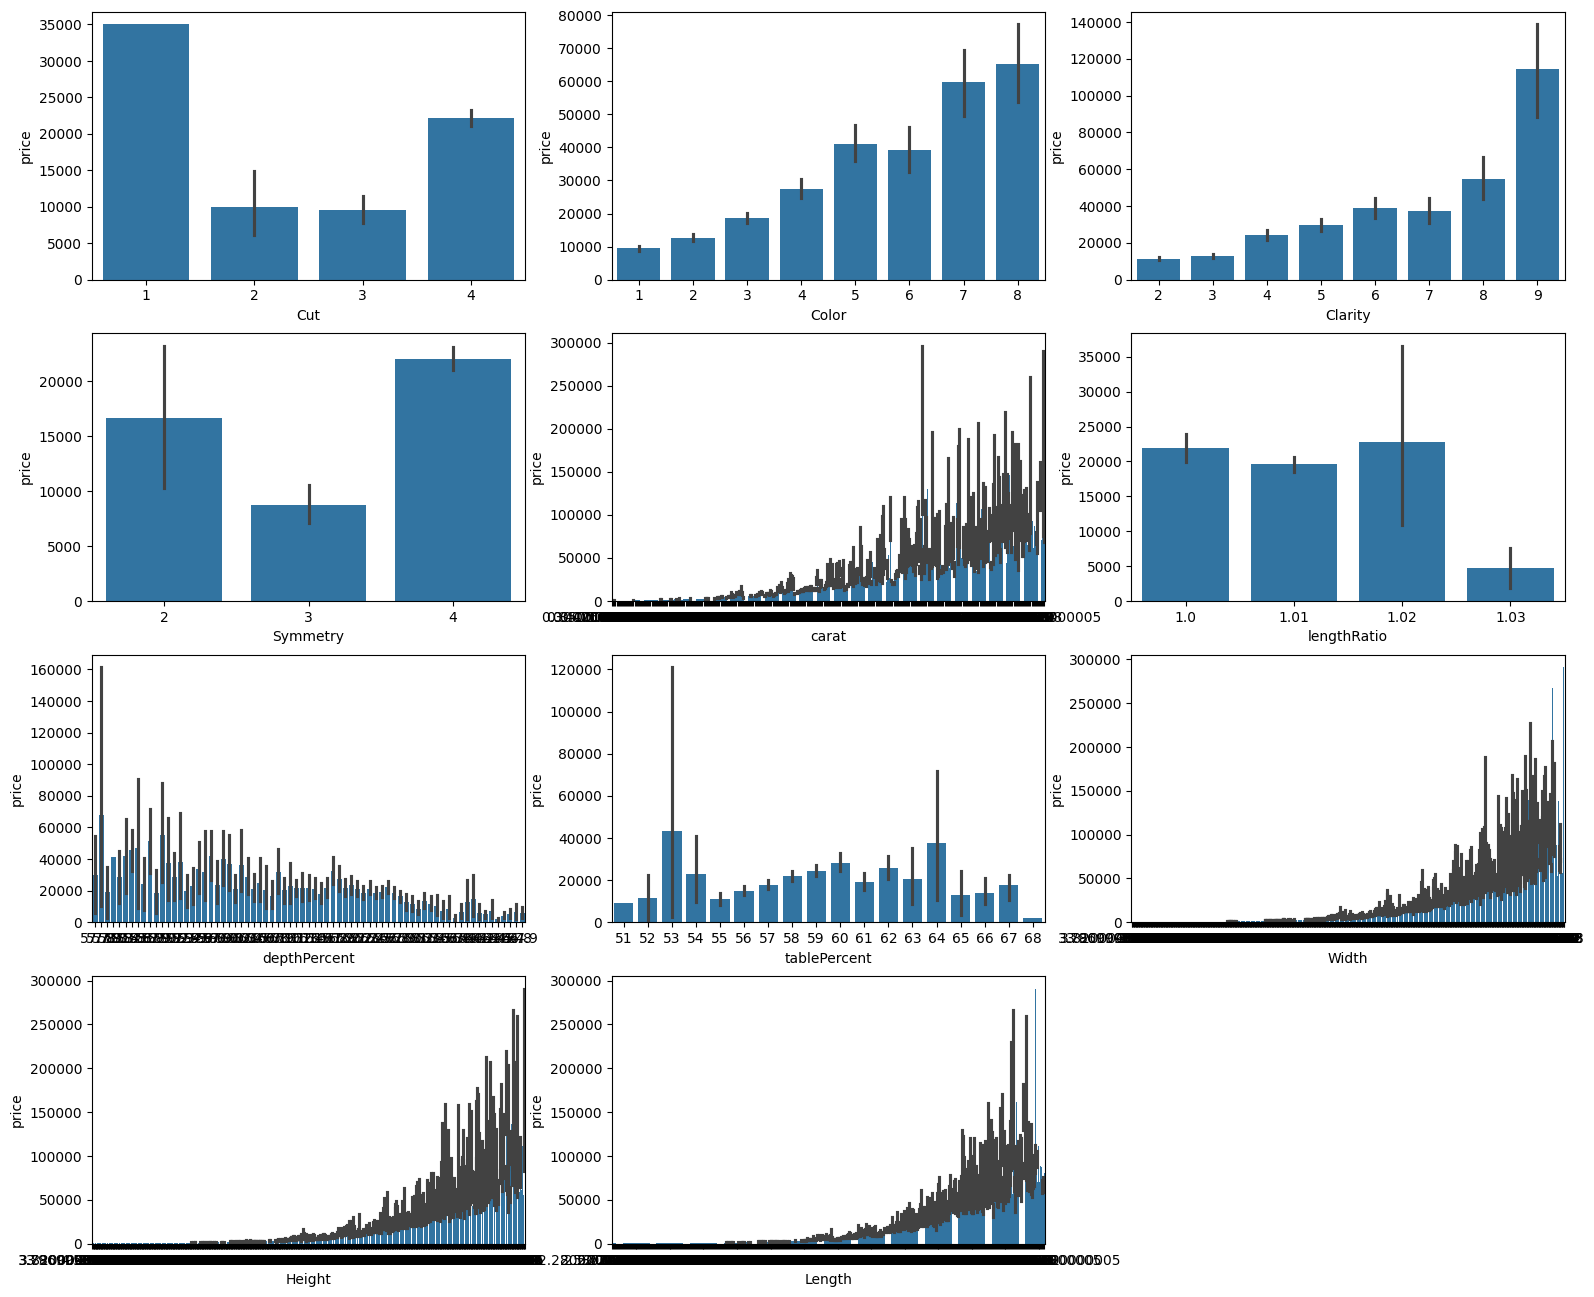

In [60]:
import matplotlib.pyplot as plt

i = 1
plt.figure(figsize=(19, 16))
for c in diamonds.columns:
    if c != 'price':
        plt.subplot(4, 3, i)
        sns.barplot(x=diamonds[c], y=diamonds['price'])
        i+=1

plt.show()

In [61]:
#Chia tập dữ liệu thành 2 phần test và train, test chiếm 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [62]:
Model = []
CV = []

In [63]:
# Sử dụng 3 phương pháp học máy
names = ["Linear Regression",
         "Decision Tree Regressor", "Random Forest Regressor"]
models = [LinearRegression(),  DecisionTreeRegressor(),
          RandomForestRegressor()]

In [64]:

RMSE = []
def evaluate(true, predicted, variable_of_model):
    RMSE.append(np.sqrt(metrics.mean_squared_error(true, predicted)))
    cv_accuracies = cross_val_score(estimator = variable_of_model, X = X_train, y = y_train.ravel(), cv = 5,verbose = 1)
    CV.append(cv_accuracies.mean())

In [65]:

def print_evaluate(true, predicted):  
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    print("RMSE:", rmse)


In [66]:
def fit_and_predict(name, model):
    variable_of_model = model
    variable_of_model.fit(X_train, y_train.ravel())
    pred = variable_of_model.predict(X_test)
    evaluate(y_test, pred, variable_of_model)

In [67]:

#Training
for name, model in zip(names, models):
    fit_and_predict(name, model)

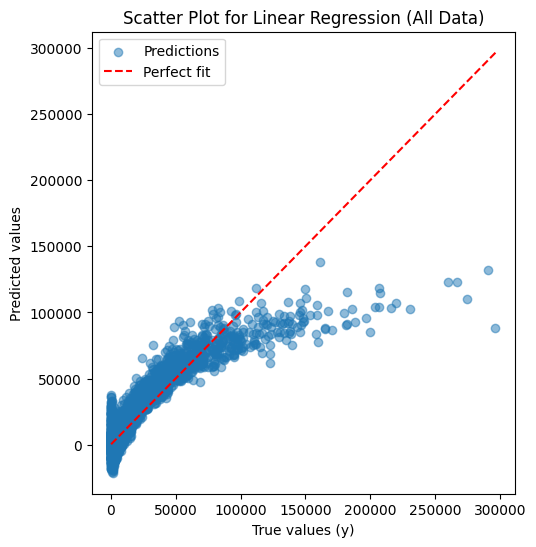

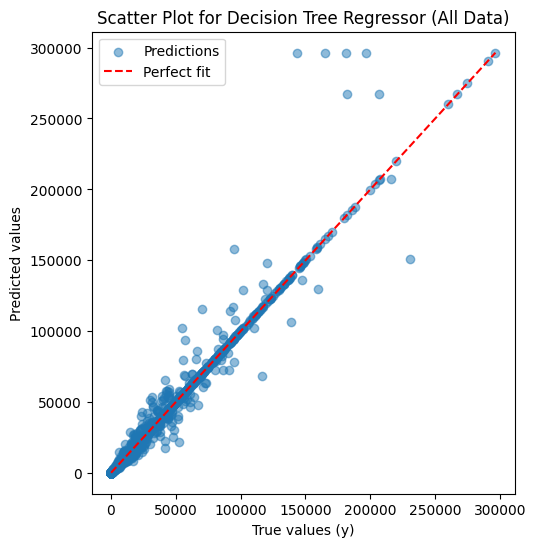

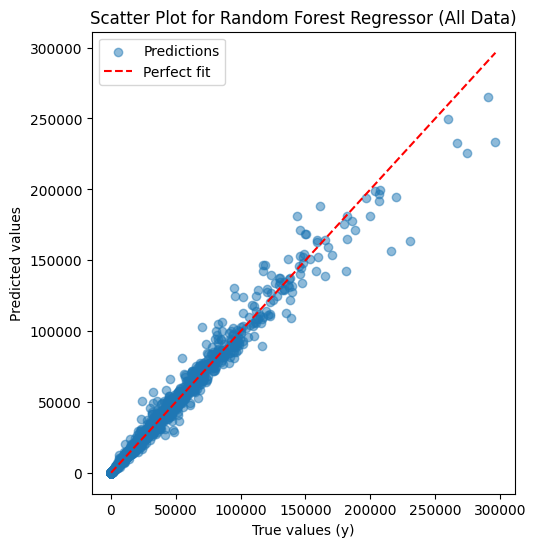

In [90]:
predictions = []
for model in models:
    model.fit(X_train, y_train.ravel())  # Không cần huấn luyện lại model
    pred = model.predict(X)  # Dự đoán trên toàn bộ tập dữ liệu
    predictions.append(pred)

# Vẽ biểu đồ phân tán và biểu đồ đường
for i, model_name in enumerate(names):
    plt.figure(figsize=(12, 6))

    # Biểu đồ phân tán
    plt.subplot(1, 2, 1)
    plt.scatter(y, predictions[i], label="Predictions", alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label="Perfect fit")
    plt.xlabel("True values (y)")
    plt.ylabel("Predicted values")
    plt.title(f"Scatter Plot for {model_name} (All Data)")
    plt.legend()

    plt.show()

In [68]:
evaluation_dataframe = pd.DataFrame({"Model": names,
                                     "RMSE": RMSE,
                                     "Cross Validation": CV})

In [69]:
#Kết quả hiệu suất của model theo các phương pháp
evaluation_dataframe

,Model,RMSE,Cross Validation
0,Linear Regression,14972.015975,0.772622
1,Decision Tree Regressor,12967.855808,0.866835
2,Random Forest Regressor,6756.681074,0.932494


## Bảng Tham số hóa
# Cut 
'Astor' = 1
'Good' = 2
'Very Good' = 3
'Excellent' = 4

# Color
'K' = 1
'J' = 2
'I' = 3
'H' = 4
'G' = 5
'F' = 6
'E' = 7
'D' = 8

# Clarity
'I1' = 1
'SI2' = 2
'SI1' = 3
'VS2' = 4
'VS1' = 5
'VVS2' = 6
'VVS1' = 7
'IF' = 8
'FL' = 9

# Symmetry
'Fair' = 1
'Good' = 2
'Very Good' = 3
'Excellent' = 4

In [70]:
# Thử nghiệm
import joblib 
test = pd.DataFrame({
    "Cut": 4,
    "Color": 1,
    "Clarity": 4,
    "Symmetry": 4,
   "carat": 0.85,
    "lengthRatio": 1.01,
    "depthPercent": 62.6,
    "tablePercent": 57,
    "Width": 6.03,
    "Height": 6.07,
    "Length": 3.79
}, index=[0])
linearRegressionModel = models[0]
decisionTreeRegressorModel = models[1] 
randomForestRegressorModel = models[2] 

pricePredict = randomForestRegressorModel.predict(test)
# In kết quả dự đoán giá kim cương
print("Kết quả dự đoán:", pricePredict)

Kết quả dự đoán: [1868.]
